Escribo acá algunos posibles ejercicios

$$\huge 🙈$$

En esta guía veremos cómo modelar una serie de datos observados usando:

1. **Máximos por Períodos** y el ***Teorema de Generalized Extreme Values (GEV)***

2. **Excesos sobre Umbral** y el ***Teorema de Generalized Pareto Distribution (GPD)***

Los datos se corresponden al dataset de $\mathcal C$arli  `[y acá iría descripción del dataset]`.

1. Para máximos por períodos: 

> usamos Gumbell como dijo Mariela? justificando que es el caso más común y (tal vez) simple de analizar.
>
> Mencionamos usos de los otros dos casos? maybe grafiquitos en imagen y fin?

1. Para umbral

> Hay solo una, pero con parámetro = 0

3. Para ambos

> * Filtrar datos => Ajustar F => Devolver parámetros
> Maybe: Guardar matriz de var-cov => calcular varianza del nivel de retorno $Var(\hat z_p)\approx \nabla z_p^T \ V \ \nabla z_p$, donde V es la matriz de var-cov de los estimadores de cada parametro
>
>   Capaz se pueda graficar el nivel de retorno en funcion del umbral, Y su varianza, para ver como varía a medida que tenemos menos datos en valores más extremos.
>
>   Y como tengo tableta de dibujo, te hago un dibujito:
>
> ![varianza-del-nivel-de-retorno.png](../Imagenes/varianza-del-nivel-de-retorno.png)


### Intuicion de distribución del máximo.

Sabemos que un histograma aproxima *(de una forma burda)* la función de densidad $f(x)$ a partir de la cual se generaron los datos $x_1, x_2, \dots, x_n$, asumiendo que son **realizaciones** de variables aleatorias $X_1, X_2, \dots, X_n \ \text{iid}$ con $X_1 \sim f$ 

In [ ]:
gridx <- seq(-3,3, 0.1)
hist(rnorm(1e5), prob=T, ylim=c(0,0.45), col='steelblue', main="Histograma de Datos ~ N(0,1)")
lines(gridx, dnorm(gridx), lwd=3, col='orange')

En el problema de modelado de máximos, queremos encontrar una función $g(x)$ a partir de la cual se generaron los datos $\hat x_1, \hat x_2, \dots ,\hat x_m$, asumiendo que son **realizaciones** de variables aleatorias $\hat X_1, \hat X_2, \dots, \hat X_m \ \text{iid}$ con $\hat X_1 \sim g$

Siendo concretos, los datos que queremos modelar son:

* Los que sobrepasan algún umbral

  * ej: "$x_i$ mayores a 30", "$x_i$ mayores al 95 percentil"
    
    
* Los máximos en un período (bloque) dado

  * ej: "teniendo $x_i$ diarios, quiero el mayor $x_i$ de cada año"
  
Llamamos $\hat x_i$ a los $x_i$ que cumplen su condición de "**máximo**" en cualquiera de los casos.

En otras palabras, solo estamos interesados en **la cola de la distribución**.


### Antes de pasar al siguiente ejercicio:

>  ¿Podés imaginar cómo resultaría un histograma de los **valores máximos** $\hat x_i$ que se encuentran **en la cola** de una Normal(0,1) como la anterior, a medida que la cantidad de muestras tiende a infinito?
>
> ¿Podés ver por qué ésto no es así? Qué sucede "alrededor" del umbral? ¿Por qué?

> > ### RTA
> > Es razonable pensar que un histograma de los valores de la cola de una Normal, será exactamente igual que recortar la cola de un histograma "completo".
> > 
> > Pero al tener un umbral que **descarta** los valores por debajo del mismo, podemos ver cómo la probabilidad (área) de caer en un entorno de $u$ se redujo a la mitad
> >
> > ![intro.png](../Imagenes/intro.png)

# Ejercicio 1.

Realice un **histograma del percentil 90** como umbral de una muestra **Normal estándar** de `1e5` elementos.

Agregue una curva de densidad estimada $\hat g$ utilizando la función `density` sobre los **datos del histograma**.

### RTA

Realizamos un histograma de los datos por encima del umbral. Para filtrarlos:
> `datos[datos > umbral]`

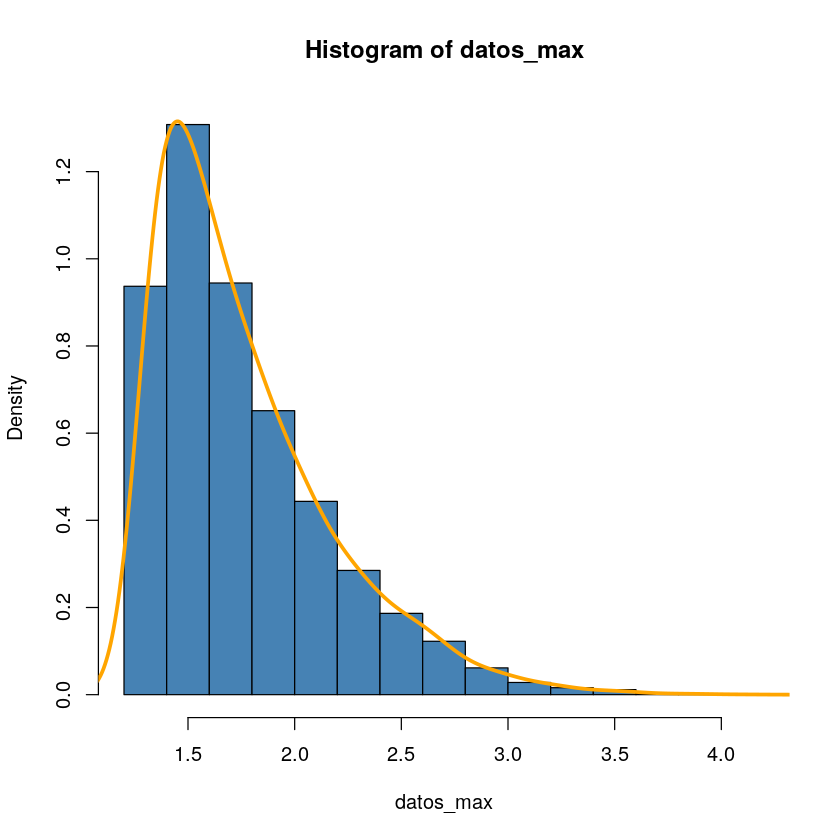

In [114]:
datos  <- rnorm(1e5)
umbral <- quantile(datos, 0.9, names=F)
datos_max <- datos[datos > umbral]
g_estim   <- density(datos_max, bw=0.1)
hist(datos_max, prob=T, col='steelblue', ylim=c(0, max(g_estim$y)))
lines(g_estim, lwd=3, col='orange')

# Nivel de Retorno - GEV

> TODO: Plot de Ret level vs -log(1-p) en escala logaritmica pag 58

Por Teorema sabemos que la distribución de máximos tiende a una GEV cuando $n \rightarrow \infty$

$$\Large \mathrm P \left(\frac{M_n-b_n}{a_n} \leq z \right) \xrightarrow[]{n\rightarrow \infty} G(z) = \exp\left\{ - \left[ 1 + \xi \ \left( \frac{z-\mu}{\sigma} \right) \right]^{-1/\xi} \right\} $$

El nivel de retorno cuando $\xi = 0$ está dado por:

$$\Large z_p = \mu - \sigma \log\{-\log(1-p)\}$$

(pag 48-49, Coles & Brenner)

Y lo que queremos hacer es estimar sus parámetros y obtener un nivel de retorno estimado.

Vamos a avanzar suponiendo que $\xi = 0$, con lo que $G(z)$ es ahora de la **Familia Gumbel**

$$\Large G(z) = \exp \left\{ -\exp \left( -\frac{z-\mu}{\sigma} \right) \right\}$$

EJ: Con `gum.fit` encuentre el parámetro $\hat \sigma$ y $\hat \mu$

In [17]:
#install.packages('evd')
#install.packages('ismev')
library(evd)
library(ismev)

ERROR: Error in library(ismev): there is no package called ‘ismev’


In [18]:
datos <- rgumbel(1e1)

1 . 

Explore el comando `gum.fit` de la librería `ismev` usando los datos del ejercicio.

¿Qué valores se corresponden a las estimaciones de máxima verosimilitud? ¿Qué representa `$se`?

In [28]:
gum <- gum.fit(datos)
gum

ERROR: Error in gum.fit(datos): could not find function "gum.fit"


        $conv
        [1] 0

        $nllh
        [1] 1561.445

        $mle
        [1] 0.03636916 0.98582371

        $se
        [1] 0.03283458 0.02429191


2 .

Reemplace los valores estimados en la función de nivel de retorno $z_p$

Defina una función `estim_zp` que tome como input el nivel $p$ y las estimaciones de $\mu$ y $\sigma$, y devuelva el nivel de retorno $z_p$

Compute el valor de zp para las estimaciones de 1, 

> **Podemos decir que el nivel de retorno $z_p$ es el valor que puede ser superado por el máximo anual en cualquier año, con probabilidad $p$**

In [27]:
estim_zp <- function(p, mu, sigma){
    zp <- mu - sigma * log( -log(1-p) )
    return(zp)
}

3. Graficar $z_p$ en función de $\log(y_p)$ para una grilla de valores entre 0.01 y 0.99, usando los parámetros estimados en 1.

In [29]:
mu    <- gum$mle[1]
sigma <- gum$mle[2]

In [53]:
gridp <- seq(0.01, 0.99, 0.01)
m <- length(gridp)
estims <- rep(NA, m)
logyps <- rep(NA, m)
for(i in 1:m){
    p <- gridp[i]
    estims[i] <- estim_zp(p, mu, sigma)
    yp <- -log(1-p)
    logyps[i] <- log(yp)
}


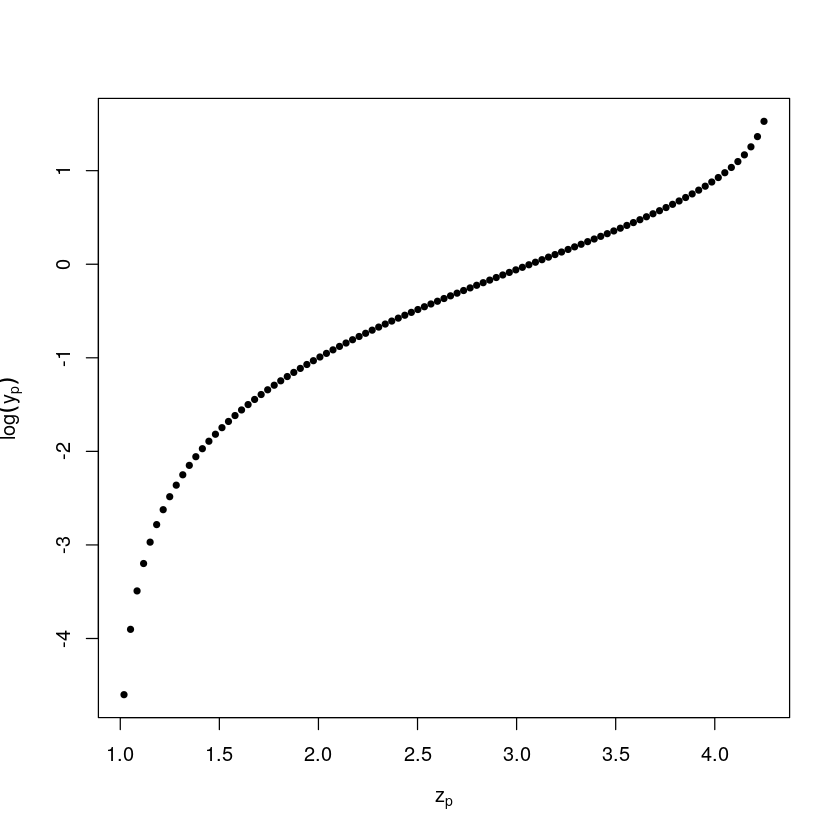

In [89]:
plot(estims, logyps, xlab=expression(z[p]), ylab=expression(log(y[p])), pch=20)

### Varianza del estimador

Por el [Método Delta](https://es.wikipedia.org/wiki/M%C3%A9todo_delta), sabemos que: 

$$\Large \mathrm{Var}(\hat z_p)\approx \nabla z_p^T \ \mathbf V \ \nabla z_p$$

Donde

> $\large \nabla z_p^T = \left[ \frac{\partial z_p}{\partial \mu},\frac{\partial z_p}{\partial \sigma}  \right]$

Derivando el $z_p$ de arriba

> $\large \frac{\partial z_p}{\partial \mu} = 1$
>
> $\large \frac{\partial z_p}{\partial \sigma} = -\log\{ -\log (1-p)\}$

4 .

Repita lo mismo que 3 pero agregando la desviación estándar en el gráfico (por encima y debajo de la curva).

Utilice la estimación de la matriz de covarianza `$cov` que devuelve `gum.fit` junto con los gradientes del estimador de $z_p$

TIP: Use el operador `%*%` para computar el producto entre matrices, y el comando `matrix(c(1, ds))` para generar una matriz de un array de datos.

In [86]:
t(matrix(c(1,2)))


1,2


In [87]:
cov <- gum$cov

gridp <- seq(0.01, 0.99, 0.01)
m <- length(gridp)
zps <- rep(NA, m)
vars <- rep(NA, m)
logyps <- rep(NA, m)
for(i in 1:m){
    p <- gridp[i]
    du <- 1
    ds <- -log( -log(1-p) ) 
    grad_zp <- matrix( c(du, ds) )
    
    zps[i]  <- estim_zp(p, mu, sigma)
    vars[i] <- t(grad_zp) %*% cov %*% grad_zp 
    yp <- -log(1-p)
    logyps[i] <- log(yp)
}


ERROR: Error in eval(expr, envir, enclos): object 'gum' not found


ERROR: Error in xy.coords(x, y): object 'vars' not found


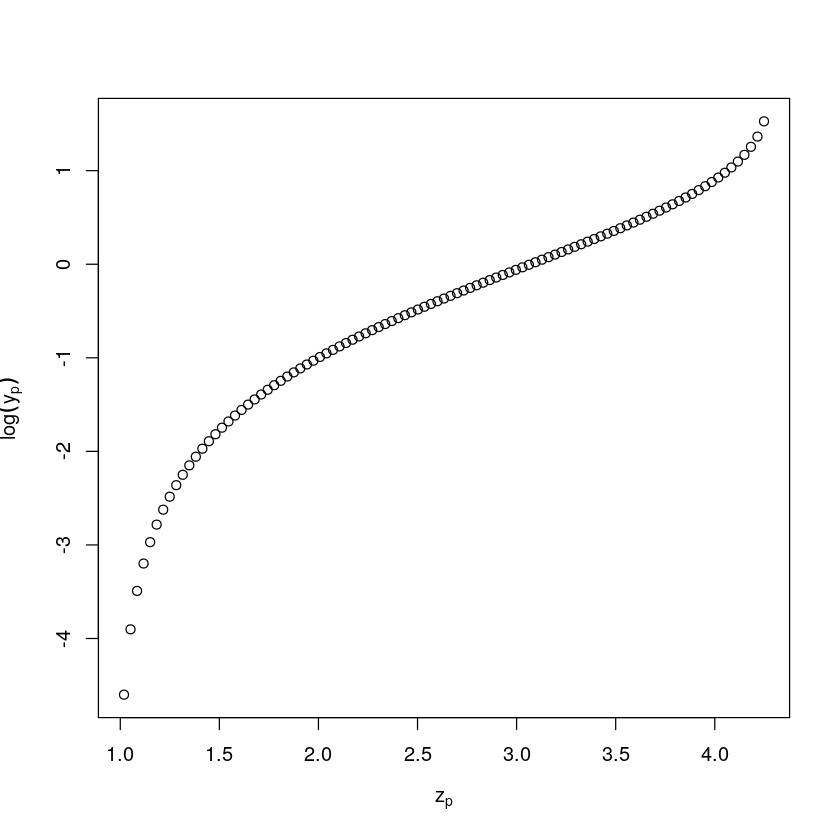

In [88]:
plot(logyps, estims, xlab=expression(z[p]), ylab=expression(log(y[p])), pch=20)
lines(logyps, estims+vars)
lines(logyps, estims-vars)

---

Capaz la pareto dejarla como opcional con otra cosa o fuera.

TODO: Ver si el mismo analisis que antes devuelve más o menos lo mismo o hay cosas muy distintas a destacar.

# Nivel de Retorno - Pareto


Es conveniente usar escalas anuales para calcular el nivel de retorno, de forma tener una interpretación simple:
> ***El nivel de retorno anual N, es el valor que se espera superar 1 sola vez cada N años***

Partiendo de que queremos calcular el área a derecha de un umbral, de una función de densidad que aproximamos con una de la **Familia Pareto Generalizada**

$$\Large \mathrm P(X>x | X>u) = \left[ 1 + \xi \left( \frac{x-u}{\sigma} \right) \right]^{-1/\xi}$$

usando definición de probabilidad condicional e igualando a $\frac 1 n$, obtenemos para el caso $\xi=0$

$$\Large z_n = u + \sigma \log (N \ n_y \ \mathrm P(X>u))$$

*(página 81 en Coles & Trener)*

EJ: Estimar el valor del parámetro $\sigma$ de la Pareto usando la función `ver funcion de R`